## Species Area and Endemic Area relationships
<img src="img.png" style="height:200px" />

Plot both SAR and EAR as a function of the relative area, using the Log Series as the SAD distribution. The SAR diagram has a three-phase behaviour: a linear
increase for small and large scales, and a sublinear shape in the intermediate scale.
The following equations describe this last regime:


$$
SAR(a) = S\frac{1 - \log\left[\nu(1 - \alpha) + \alpha\right]}{\log(\nu)}
$$

where:
- $\nu ≡ b_0$;
- $S$ is the total population;
- $\alpha = \frac{a_k}{\sum_{n=1}^{\infty} a_k}$ is an adimensional quantity with $a_k$ area of the subregions;
- $P(n) = c (1-\nu)^n / n $ is a log-series distribution ($c = \frac{1}{log(\nu)}$);
- vector of the abundances $n = ( n_1 , n_2 , . . . , n_S )$.
$$
EAR(a) = S \sum_{n=1}^{\infty} \alpha^n P(n)
$$

Compare SAR behaviour with a Power Law SAR of exponent $z=0.25$ $(S(a)=k A^z)$ and $k$ tuned so the be as close as possible to the solution for the random placement case. 

#### SAR  and power law approximation for different $b_0$


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
# Define constants
S = 1000  # Total population
b0 = 0.01  # ν 
n =  np.array([random.randint(0, 100) for _ in range(S)])  # n, vector of aboundancies
c = 1 / np.log(b0)  # Constant for the log-series distribution

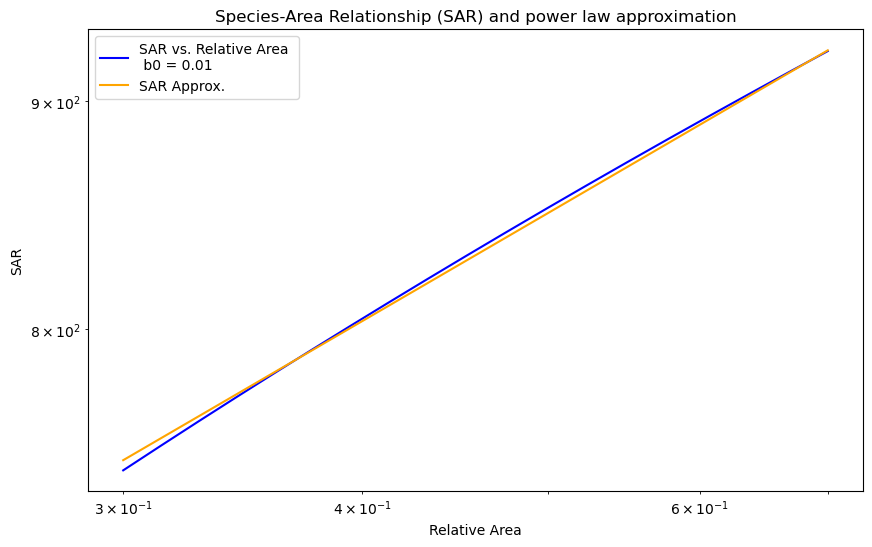

In [3]:
# Function to calculate SAR for a given relative area 'a'
def calculate_sar(a):
    term1 = np.log(b0 * (1 - a) + a)
    term2 = np.log(b0)
    return S * (1 - term1 / term2)

# Generate a range of relative areas
relative_areas = np.linspace(0.3, 0.7, 200)

# Calculate SAR for each relative area
sar_values = [calculate_sar(a) for a in relative_areas]

#calculate power law SAR of exponent z=0.25
k = 1.01
sar_approx = [S*k*a**0.25 for a in relative_areas]

# Plot SAR as a function of relative area
plt.figure(figsize=(10, 6))
#plt.plot(relative_areas, ear_values, label='EAR vs. Relative Area', color='red')

plt.plot(relative_areas, sar_values, label='SAR vs. Relative Area \n b0 = 0.01', color='b')
plt.plot(relative_areas, sar_approx, label='SAR Approx. ', color='orange')
plt.xlabel('Relative Area')
plt.ylabel('SAR')
plt.title('Species-Area Relationship (SAR) and power law approximation')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

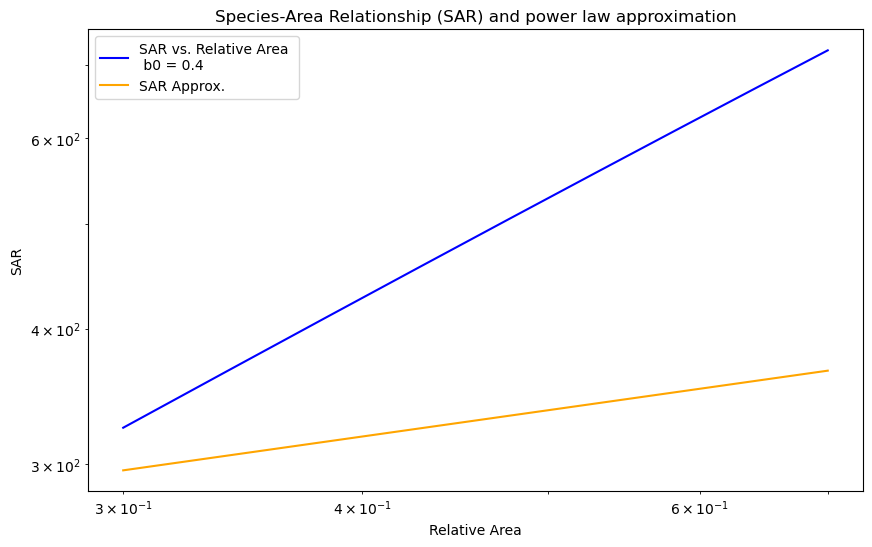

In [4]:
b0 = 0.8

# Calculate SAR for each relative area
sar_values = [calculate_sar(a) for a in relative_areas]

#calculate power law SAR of exponent z=0.25
k = 0.4
sar_approx = [S*k*a**0.25 for a in relative_areas]

# Plot SAR as a function of relative area
plt.figure(figsize=(10, 6))
#plt.plot(relative_areas, ear_values, label='EAR vs. Relative Area', color='red')

plt.plot(relative_areas, sar_values, label='SAR vs. Relative Area \n b0 = 0.4', color='b')
plt.plot(relative_areas, sar_approx, label='SAR Approx. ', color='orange')
plt.xlabel('Relative Area')
plt.ylabel('SAR')
plt.title('Species-Area Relationship (SAR) and power law approximation')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

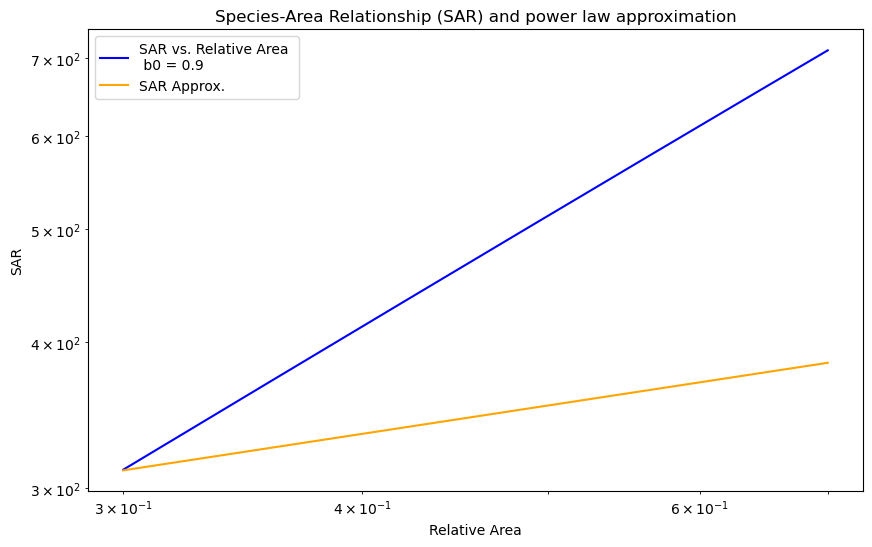

In [5]:
b0 = 0.9

# Calculate SAR for each relative area
sar_values = [calculate_sar(a) for a in relative_areas]

#calculate power law SAR of exponent z=0.25
k = 0.42
sar_approx = [S*k*a**0.25 for a in relative_areas]

# Plot SAR as a function of relative area
plt.figure(figsize=(10, 6))
#plt.plot(relative_areas, ear_values, label='EAR vs. Relative Area', color='red')

plt.plot(relative_areas, sar_values, label='SAR vs. Relative Area \n b0 = 0.9', color='b')
plt.plot(relative_areas, sar_approx, label='SAR Approx. ', color='orange')
plt.xlabel('Relative Area')
plt.ylabel('SAR')
plt.title('Species-Area Relationship (SAR) and power law approximation')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

#### EAR 
The EAR (Endemic Area Relationship) measures the number of endemic species within habitats of different sizes.  To calculate the EAR, we employ two different methods:

1. Numerical approach: we approximate the summation over $n$ from $0$ to infinity using a for loop to compute it numerically.

2. Analytical Approach: we use mathematical software (Mathematica) to analytically compute the summation and then visualize the result by plotting it.

#####  Analytical Approach

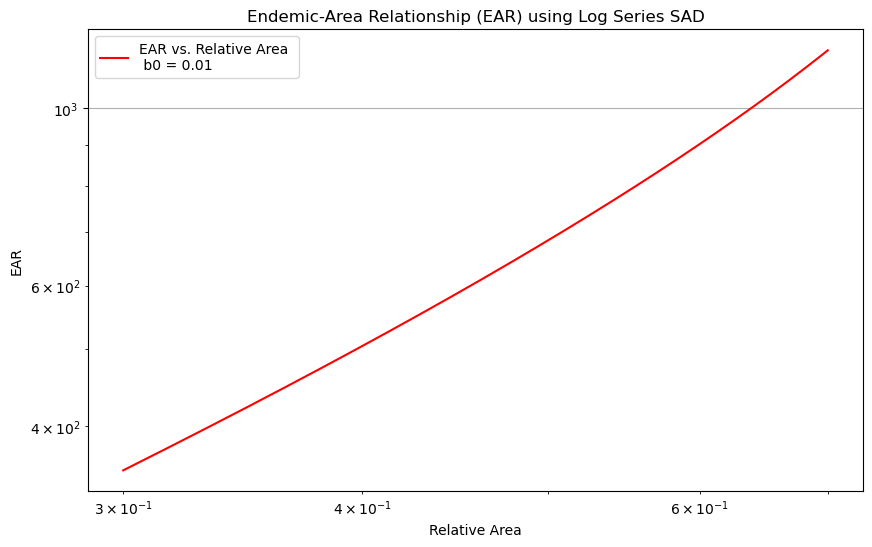

In [6]:
# Function to calculate EAR for a given relative area 'a' and vector of aboundancies n
#sum alpha^n*(1 - b0)^n/n, n from 1 to infinity
b0 = 0.01
def calculate_ear(a, n):
    term1 = -a + a*b0 +1
    return S*np.sum(-np.log(term1))

# Calculate EAR for each relative area
ear_values = [calculate_ear(a, n) for a in relative_areas]

# Plot EAR as a function of relative area
plt.figure(figsize=(10, 6))
plt.plot(relative_areas, ear_values, label='EAR vs. Relative Area \n b0 = 0.01', color='r')
plt.xlabel('Relative Area')
plt.ylabel('EAR')
plt.title('Endemic-Area Relationship (EAR) using Log Series SAD')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


##### Numerical approach

In [7]:
def EAR(a, n, b0, n_max=100):
    
    EAR_value = 0.0
    c = 1 / np.abs(np.log(b0))
    for n in range(1, n_max + 1):
        # P(n) using the log-series distribution
        P_n = c * ((1 - b0)**n) / n
        
        # alpha^n
        alpha_n = a**n
        
        # Add the contribution of this term to EAR
        EAR_value += alpha_n * P_n
    
    #final EAR value
    EAR_value *= S
    
    return EAR_value

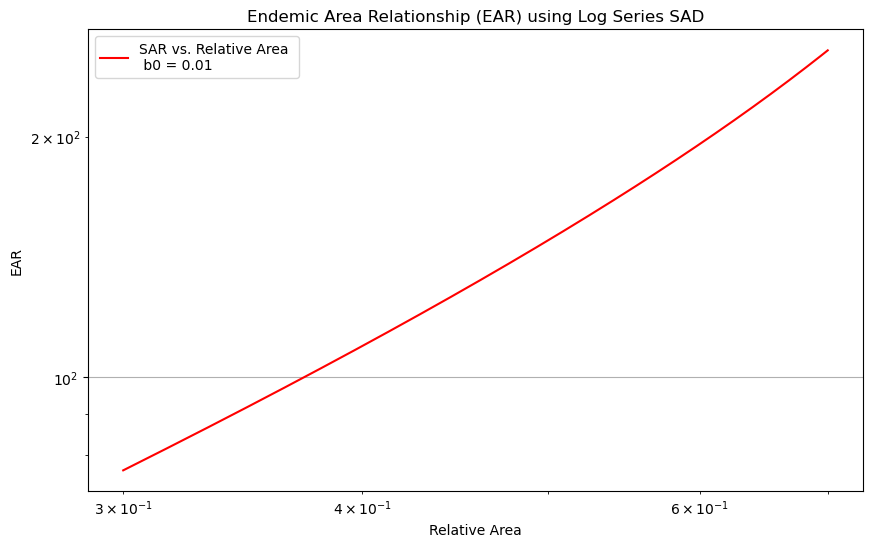

In [8]:
b0=0.01
relative_areas = np.linspace(0.3, 0.7, 200)
ear_values = [EAR(a, n, b0, n_max=1000) for a in relative_areas]

# Plot EAR as a function of relative area
plt.figure(figsize=(10, 6))
plt.plot(relative_areas, ear_values, label='SAR vs. Relative Area \n b0 = 0.01 ', color='red')
plt.xlabel('Relative Area')
plt.ylabel('EAR')
plt.title('Endemic Area Relationship (EAR) using Log Series SAD')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

### A comparison between SAR, EAR (numerical approach) and Power Law SAR

In [9]:
# Generate a range of relative areas
relative_areas = np.linspace(0.3, 0.7, 200)

# Calculate SAR for each relative area
sar_values = [calculate_sar(a) for a in relative_areas]
ear_values = [EAR(a, n, b0, n_max=1000) for a in relative_areas]

#calculate power law SAR of exponent z=0.25
k = 1.01
sar_approx = [S*k*a**0.25 for a in relative_areas]

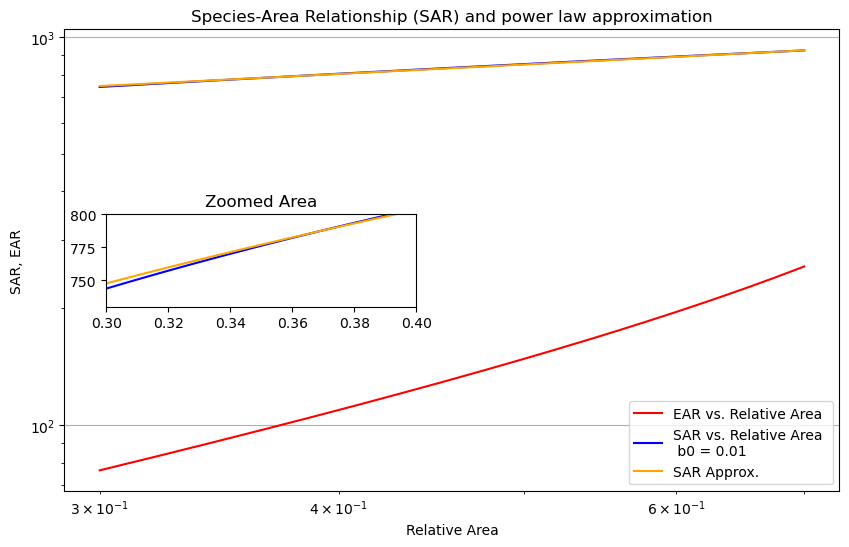

In [10]:
plt.figure(figsize=(10, 6))

plt.plot(relative_areas, ear_values, label='EAR vs. Relative Area', color='red')
plt.plot(relative_areas, sar_values, label='SAR vs. Relative Area \n b0 = 0.01', color='blue')
plt.plot(relative_areas, sar_approx, label='SAR Approx.', color='orange')

plt.xlabel('Relative Area')
plt.ylabel('SAR, EAR')
plt.title('Species-Area Relationship (SAR) and power law approximation')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

# Zoom
axins = inset_axes(plt.gca(), width='40%', height='20%', loc='center left', borderpad=3)
axins.plot(relative_areas, sar_values, color='blue')
axins.plot(relative_areas, sar_approx, color='orange')
axins.set_title('Zoomed Area')
axins.set_xlim(0.3, 0.4)
axins.set_ylim(730, 800)
plt.show()
